# ***`Libreria Kraken`***

$ \ $

`Kraken` es un sistema de reconocimiento óptico de caracteres, el cual es de código abierto y se basa un sistema de reconocimiento óptico de caracteres un poco más viejo llamado `OCRopus`.

$ \ $ 

Usaremos  `Kraken` para detectar líneas de texto en cuadros delimitadores en una determinada imagen. Aunque `tesseract` es muy útil en imagenes que contienen texto sin mucha interferencia, `tesseract` se confunde si la imagen tiene muchas cosas que interfieren con la lectura de datos. Aunque se pueden hacer recortes en imagenes para evitar este tipo de problemas de extracción de texto en `tesseract` es interesante saber si existe otras maneras de extraer este tipo de información.  En este caso,  `Kraken` nos ayudará segmentar páginas y extraer la información textual de una determinada imagen.

$ \ $ 

In [1]:
#(1) importamos kraken manualmente
!pip install kraken==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#(1) importamos el paquete kraken.
import kraken


#(2) exploramos un poco el contenido de kraken.
help(kraken)



Help on package kraken:

NAME
    kraken - entry point for kraken functionality

PACKAGE CONTENTS
    binarization
    ketos
    kraken
    lib (package)
    linegen
    pageseg
    repo
    rpred
    serialization
    transcribe

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    /usr/local/lib/python3.7/dist-packages/kraken/__init__.py




In [3]:
#(1) importamos el paquete  kraken.
import kraken


#(2) importamos el módulo pageseg de kraken.
from kraken import pageseg


#(3) exploramos el módulo pageseg de kraken.
help(kraken.pageseg)



Help on module kraken.pageseg in kraken:

NAME
    kraken.pageseg

DESCRIPTION
    kraken.pageseg
    ~~~~~~~~~~~~~~
    
    Layout analysis and script detection methods.

FUNCTIONS
    detect_scripts(im, bounds, model='/usr/local/lib/python3.7/dist-packages/kraken/script.mlmodel', valid_scripts=None)
        Detects scripts in a segmented page.
        
        Classifies lines returned by the page segmenter into runs of scripts/writing systems.
        
        Args:
            im (PIL.Image): A bi-level page of mode '1' or 'L'
            bounds (dict): A dictionary containing a 'boxes' entry with a list of
                           coordinates (x0, y0, x1, y1) of a text line in the image
                           and an entry 'text_direction' containing
                           'horizontal-lr/rl/vertical-lr/rl'.
            model (str): Location of the script classification model or None for default.
            valid_scripts (list): List of valid scripts.
        
        Re

$ \ $

Al análizar el módulo ***pageseg*** de kraken, nos damos cuenta que este módulo tiene una  función  llamada `segment`, la cual segmenta una página en líneas de texto y devuelve las coordenadas de cada línea en orden de lectura.  Además, algunas cosas que podemos notar de la función `segment` son:

$ \ $

(1) Parámetros de `segment`=(im, text_direction, scale, maxcolseps, black_colseps, no_hlines, pad, mask,  reading_order_fn)



*   im = Una página de dos niveles del modo '1' o 'L'.

*   text_direction = dirección principal del texto.

*   scale = Escala de la imagen. Se determinará automáticamente si se establece en 'None'.

*   maxcolseps = Número máximo de separadores de columnas de espacios en blanco.

*   black_colseps (True / False) = Si los separadores de columnas son lineas negras verticales o no.
                         

*   no_hlines = Interruptor para eliminación de líneas horizontales pequeñas.


*   pad (int o tuple) = Relleno para añadir a los cuadros delimitados por las lineas.

*   mask = Una imagen de máscara de dos niveles del mismo tamaño que "im" donde las regiones con valor 0 se ignoran con fines de segmentación. Deshabilita la columna detección.


$ \ $

(2) Salida de `segment` (return)= Un diccionario que contiene la dirección del texto y una lista en orden de lectura de los cuadros delimitadores ordenados bajo la clave “boxes” como se muestra a continuación 

$$\text{ \{“text_direction”: “\$dir”, “boxes”: [(x1, y1, x2, y2),...]\} }$$


$ \ $ 



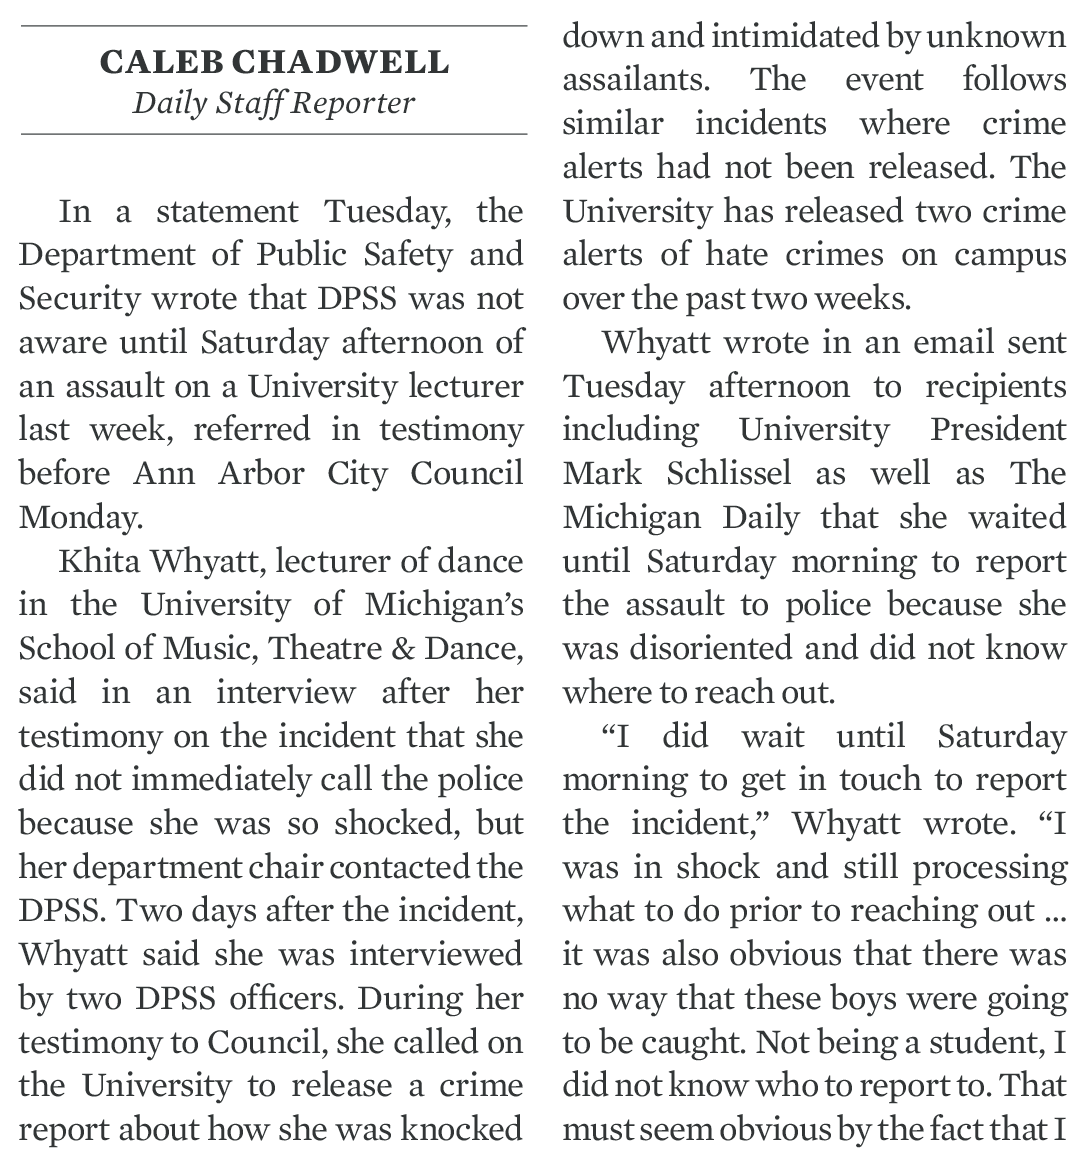

In [4]:
#(1) importamos el paquete  kraken.
import kraken


#(2) importamos el módulo pageseg de kraken.
from kraken import pageseg


#(3) importamos el módulo Image de la librería de imagenes PIL.
from PIL import Image


#(4) cargamos la ruta "/content/two_col.png" de la imagen y le damos como nombre imagen.
imagen=Image.open("two_col.png")


#(5) Mostramos en pantalla la imagen.
display(imagen)



$ \ $ 

Veamos como extraer los cuadros delimitadores de las lineas de texto de la imagen mostrada anteriormente.

$ \ $

In [5]:
#(1) importamos el paquete  kraken.
import kraken


#(2) importamos el módulo pageseg de kraken.
from kraken import pageseg


#(3) importamos el módulo Image de la librería de imagenes PIL.
from PIL import Image


#(4) cargamos la ruta "/content/two_col.png" de la imagen y le damos como nombre imagen.
imagen=Image.open("two_col.png")


#(5) creamos una copia de la imagen a blanco y negro, y le damos el nombre de imagen_1.
imagen_1=imagen.convert("1")


#(6) usamos la funcion pageseg.segment para extraer los cuadros delimitadores de las lineas de texto en la imagen llamada imagen_1.
cuadros_delimitados=pageseg.segment(imagen_1, black_colseps=True)["boxes"]


#(7) mostramos en pantalla los cuadros delimitadores encontrados en (6).
print(cuadros_delimitados, "\n")



[[100, 50, 449, 74], [131, 88, 414, 120], [59, 196, 522, 229], [18, 239, 522, 272], [19, 283, 522, 316], [19, 327, 525, 360], [19, 371, 523, 404], [18, 414, 524, 447], [17, 458, 522, 491], [19, 502, 141, 535], [58, 546, 521, 579], [18, 589, 522, 622], [19, 633, 521, 665], [563, 21, 1066, 54], [564, 64, 1066, 91], [563, 108, 1066, 135], [564, 152, 1065, 179], [563, 196, 1065, 229], [563, 239, 1066, 272], [562, 283, 909, 316], [600, 327, 1066, 360], [562, 371, 1066, 404], [562, 414, 1066, 447], [563, 458, 1065, 485], [563, 502, 1065, 535], [562, 546, 1066, 579], [562, 589, 1064, 622], [562, 633, 1066, 660], [18, 677, 833, 704], [18, 721, 1066, 754], [18, 764, 1065, 797], [17, 808, 1065, 841], [18, 852, 1067, 885], [18, 895, 1065, 928], [17, 939, 1065, 972], [17, 983, 1067, 1016], [18, 1027, 1065, 1060], [18, 1070, 1065, 1103], [18, 1114, 1065, 1147]] 



$ \ $

----

Construyamos ahora una función que realice los dibujos de los cuadros delimitadores de una imagen.

$ \ $

In [6]:
#(1) importamos el paquete  kraken.
import kraken


#(2) importamos el módulo pageseg de kraken.
from kraken import pageseg


#(3) importamos el módulo Image de la librería de imagenes PIL.
from PIL import Image


#(4) importamos el módulo ImageDraw de la librería de imagenes PIL.
from PIL import ImageDraw


#(5) construimos una función que muestre los cuadros delimitadores de las lineas de texto de una imagen con texto. Estos cuadros están descritos geométricamente como rectangulos rojos
def mostrar_cuadros_1(imagen):  

   
    #(5.1) permitimos ejecutar dibujos sobre la imagen.
    dibujo_objeto=ImageDraw.Draw(imagen)


    #(5.2) creamos una copia de la imagen a blanco y negro. Esto se hace con el objetivo de poder usar la función segment del módulo pageseg.
    imagen_1=imagen.convert("1")


    #(5.3) usamos la funcion segment del módulo pageseg sobre la imagen_1 para obtener los cuadros delimitadores de las lineas de texto de la imagen_1.
    cuadros_delimitados=pageseg.segment(imagen_1)["boxes"]


    #(5.4) realizamos los dibujos de los cuadros delimitadores de las lineas de texto de la imagen.
    for x in cuadros_delimitados:      
      dibujo_objeto.rectangle(x, fill = None, outline ="red")


    #(5.5) mostramos en pantalla los cuadros delimitadores dibujados sobre la imagen original.
    return imagen




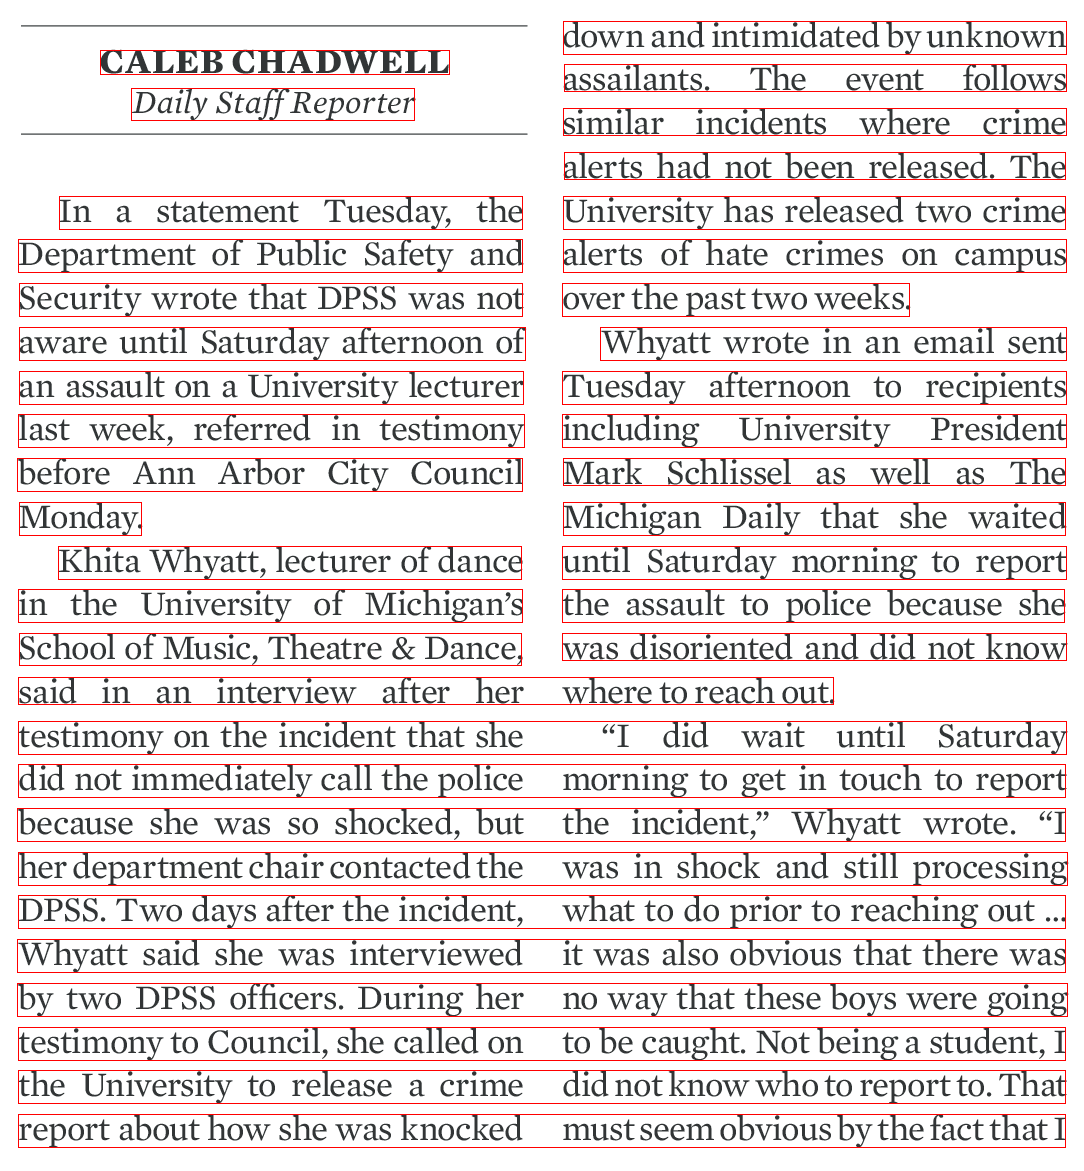

In [7]:
#(1) cargamos la ruta "two_col.png" de la imagen y le damos el nombre de imagen.
imagen=Image.open("two_col.png")


#(2) mostramos en pantalla los cuadros delimitadores de las lineas de texto de la imagen dada usando la función construida previamente.
display(mostrar_cuadros_1(imagen)) 



$ \ $

Hemos realizado un buen trabajo con la imagen anterior, pero al parecer tenemos problemas en algunos sectores donde los cuadros se extendieron en las dos columnas. Para arreglar este inconveniente, notamos que la función `pageseg.segment(*)` tiene varios parámetros y algunos de ellos los podemos usar para mejorar nuestra segmentación de renglones. 

$ \ $ 


-----

Por ejemplo, si analizamos el parámetro **black_colseps**, nos damos cuenta que al establecer su valor como **True**, entonces Kraken asumirá que las columnas de nuestra imagen se separarán por líneas de color negro. Veamos en práctica esto que estamos mencionando.


$ \ $ 

In [8]:
#(1) importamos el paquete  kraken.
import kraken


#(2) importamos el módulo pageseg de kraken.
from kraken import pageseg


#(3) importamos el módulo Image de la librería de imagenes PIL.
from PIL import Image


#(4) importamos el módulo ImageDraw de la librería de imagenes PIL.
from PIL import ImageDraw


#(5) construimos una función que muestre los cuadros delimitadores de las lineas de texto de una imagen con texto. Estos cuadros están descritos geométricamente como rectangulos rojos
def mostrar_cuadros_2(imagen):  

   
    #(5.1) permitimos ejecutar dibujos sobre la imagen.
    dibujo_objeto=ImageDraw.Draw(imagen)


    #(5.2) creamos una copia de la imagen a blanco y negro. Esto se hace con el objetivo de poder usar la función segment del módulo pageseg.
    imagen_1=imagen.convert("1")


    #(5.3) usamos la funcion segment del módulo pageseg sobre la imagen_1 para obtener los cuadros delimitadores de las lineas de texto de la imagen_1. Tener en cuenta que black_colseps=True significa que las columnas de nuestra imagen se separarán por líneas de color negro.
    cuadros_delimitados=pageseg.segment(imagen_1, black_colseps=True)["boxes"]


    #(5.4) realizamos los dibujos de los cuadros delimitadores de las lineas de texto de la imagen.
    for x in cuadros_delimitados:      
      dibujo_objeto.rectangle(x, fill = None, outline ="red")


    #(5.5) mostramos en pantalla los cuadros delimitadores dibujados sobre la imagen original.
    return imagen




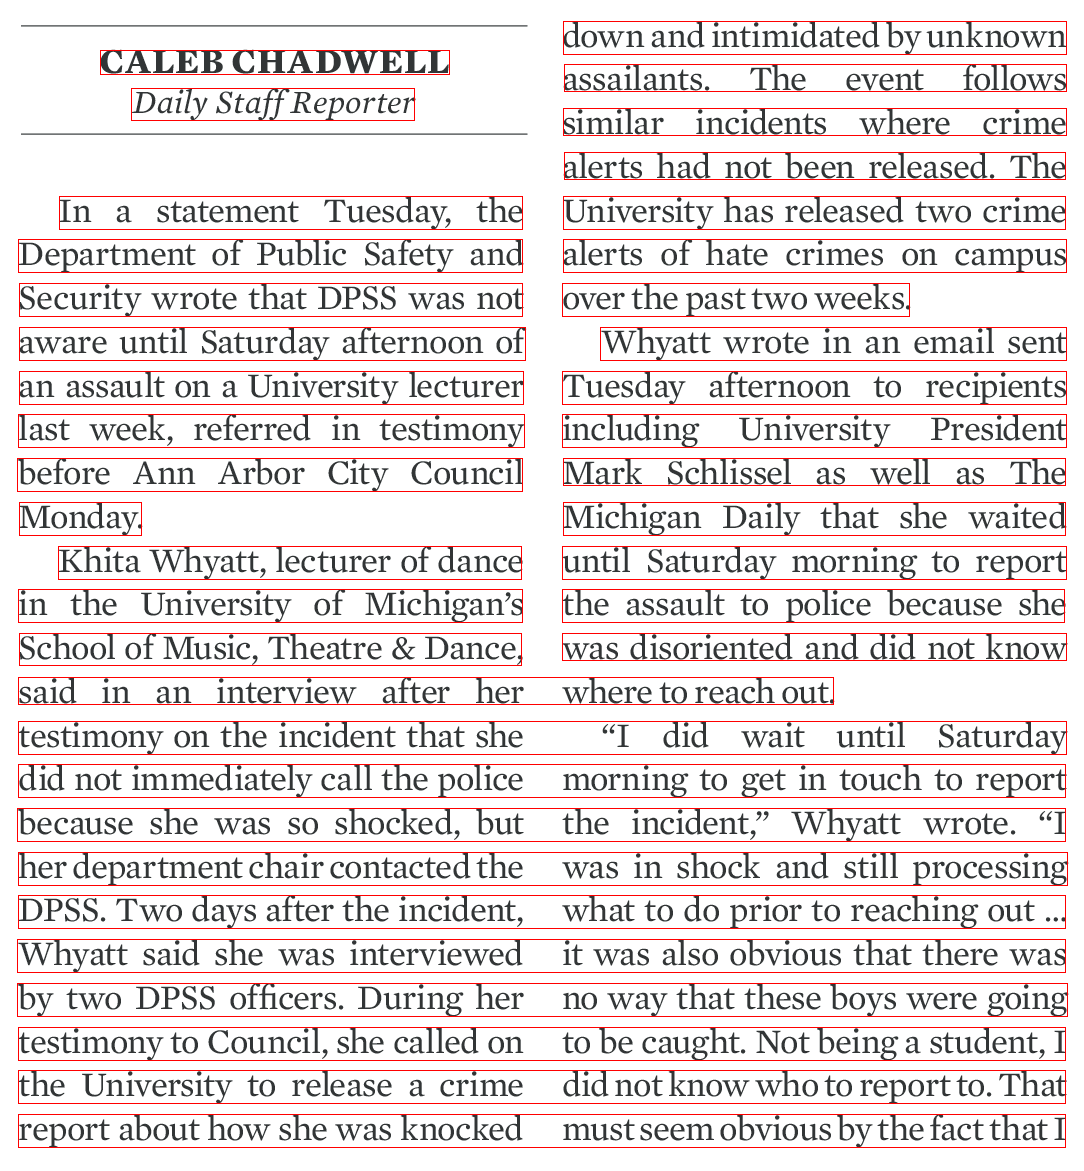

In [9]:
#(1) cargamos la ruta "two_col.png" de la imagen y le damos el nombre de imagen.
imagen=Image.open("two_col.png")


#(2) mostramos en pantalla los cuadros delimitadores de las lineas de texto de la imagen dada usando la función construida previamente.
display(mostrar_cuadros_2(imagen)) 



$ \ $

Aparentemente obtuvimos el mismo resultado.

----

$ \ $

Veamos ahora como describir un separador de columnas (blanco para que no se pueda percibir). Estos separadores lo pondremos siempre que el espacio entre las columnas sea mayor o igual a 25 píxeles de ancho (que es aproximadamente el ancho de un carácter), y seis renglones de alto. 

$ \ $

In [10]:
#(1) importamos el paquete  kraken.
import kraken


#(2) importamos el módulo pageseg de kraken.
from kraken import pageseg


#(3) importamos el módulo Image de la librería de imagenes PIL.
from PIL import Image


#(4) importamos el módulo ImageDraw de la librería de imagenes PIL.
from PIL import ImageDraw


#(5) construimos una función que calcule la altura promedio de un renglón teniendo en cuenta los cuadros obtenidos anteriormente con la función segment del módulo pageseg.
def calcular_altura_ren(imagen):

    #(5.1) realizamos una copia de la imagen a blanco y negro, y le damos el nombre de imagen_1.
    imagen_1=imagen.convert("1")

    
    #(5.2) usamos la funcion segment del módulo pageseg sobre la imagen_1 para obtener los cuadros delimitadores de las lineas de texto de la imagen_1. 
    cuadros_delimitados=pageseg.segment(imagen_1)['boxes']


    #(5.3) obtenemos la suma de las alturas de los cuadros delimitadores de las lineas de texto de la imagen.
    acumulador_altura=0
    for A in cuadros_delimitados:
        #A=(x_1, y_1, x_2, y_2) por lo tanto A[1]=y_1 and A[3]=y_2
        acumulador_altura += A[3]-A[1]


    #(5.4) obtenemos el promedio entero de la altura de un cuadro
    return int(acumulador_altura/len(cuadros_delimitados))



In [11]:
#(1) cargamos la ruta "two_col.png" de la imagen y le damos el nombre imagen.
imagen=Image.open("two_col.png")


#(2) calculamos la altura promedio entera de los cuadros delimitadores de los renglones de la imagen.
altura_ren=calcular_altura_ren(imagen)


#(3) mostramos en pantalla el resultado de (2). 
print(altura_ren)



31


$ \ $

-----

Realizando algunos calculos en la imagen que hemos trabajado, deducimos que el rectángulo que separa la columna de la izquierda y la columna de la derecha tiene dimensiones aproximadas de 25x186 como se muestra a continuación.


$ \ $ 



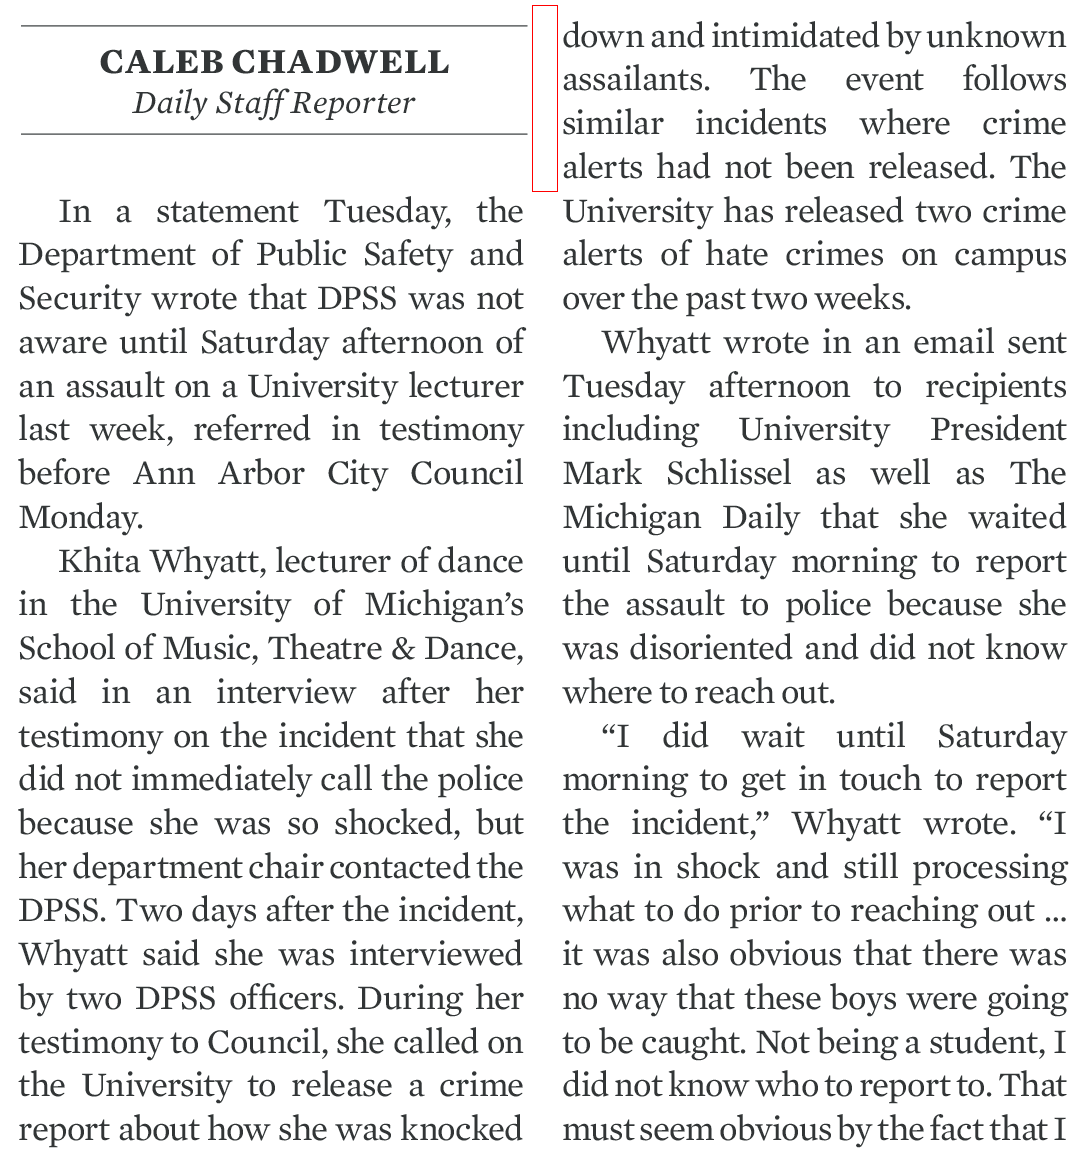

In [12]:
#(1) importamos el paquete  kraken.
import kraken


#(2) importamos el módulo pageseg de kraken.
from kraken import pageseg


#(3) importamos el módulo Image de la librería de imagenes PIL.
from PIL import Image


#(4) importamos el módulo ImageDraw de la librería de imagenes PIL.
from PIL import ImageDraw


#(5) cargamos la ruta "two_col.png" de la imagen y le damos el nombre imagen.
im=Image.open("two_col.png")


#(6) cargamos la ruta "two_col.png" de la imagen y le damos el nombre imagen.
im=Image.open("two_col.png")


#(7) permitimos ejecutar dibujos sobre la imagen im.
dibujito=ImageDraw.Draw(im)


#(8) [18, 239, 522, 272]
dibujito.rectangle([532,5,557,191], fill = None, outline ="red")


#(9) mostramos en pantalla el rectángulo dibujado sobre la imagen im.
display(im)



$ \ $

------

Construyamos ahora una función que nos diga, si en cierta localización de una imagen, existe tenemos espacio para intruducir un rectángulo como el mostrado en la figura anterior.

$ \ $

In [13]:
# construimos una funcion que toma como parámetros una imagen y un punto del plano, y produce de salida un valor boolenano.
# los parámetros son imagen y loc. Imagen es precisamente una figura en algún formato (PNG, JPG,..., etc) y loc son las coordenadas (x,y) de un píxel
# el valor booleano que devuelve la función es True si debajo del píxel dado existe un cuadro blanco con la misma longitud que el rectángulo mostrado anteriormente y False en caso contrario
def chequeo_esp_blanco(imagen, loc):

  #(1) calculamos los tamaños de la imagen (ancho y largo).
  a=imagen.width
  b=imagen.height


  #(2) describimos las coordenadas del píxel loc
  x_1=loc[0]
  y_1=loc[1]


  #(3) tomamos el cuadro que tiene como esquina superior izquierda el pixel loc y tiene las mismas medidas de cuadro_vacio
  rango_x=range(x_1,x_1+25)
  rango_y=range(y_1,y_1+186)
    

  #(4) nos movemos sobre los pixeles del cuadro (rango_x,rango_y) construido intuitivamente en (3) sin salirnos de la imagen dada y verificamos si todos los pixeles son NO BLANCOS. 
  # en el caso en que todos los  píxeles en el cuadro anterior sean blancos, entonces la función devolverá True y en caso contrario False
  # en este caso True significa que existe un cuadro blanco debajo del pixel loc en  imagen 
  for x in rango_x:        
    for y in rango_y:
      if x < a and y < b:           
        if imagen.getpixel((x,y)) != 255:
          return False
      elif not (x < a and y < b):
        return False
  return True



$ \ $

----

A continuación construiremos una función la cual realiza el dibujo de un segmento de recta que tiene la misma altura del rectángulo de espacio construido anteriormente.

$ \ $

In [14]:
#(1) creamos una función que realice el dibujo de una linea teniendo en cuenta las dimensiones del rectangulo de espacio.
#(1.1) loc representa las coordenadas (x,y) de un píxel.
#(1.2) loc=(x_1,y_1) <----------> loc[0]=x_1 y loc[1]=y_1.
def dibujar_separador(imagen, loc):

    #(2) permitimos que se puedan realizar dibujos sobre la imagen.  
    dibujo_objeto=ImageDraw.Draw(imagen)


    #(3) describimos las coordenadas de loc.
    x_1=loc[0]
    y_1=loc[1]


    #(4) sumamos la mitad de del el ancho de cuadro_blanco a la componente horizontal de loc (int(25/2)=12).
    x_1 +=12


    #(5) como una linea es un rectángulo, donde uno de sus lados tiene longitud cero. Es decir, si (x_1,y_1,x_2,y_2) es la descripción del rectángulo, entonces x_1=x_2 y y_2=y_1+altura(cuadro_blanco)
    x_2=x_1
    y_2=y_1+186

    
    #(6) realizamos el dibujo de la linea usando la función ImageDraw.Draw(imagen).rectangle(*)
    dibujo_objeto.rectangle((x_1,y_1,x_2,y_2), fill = "black", outline ="red")


    #(7) la función tiene como salida la imagen con la linea dibujada.
    return imagen    



$ \ $

-------

## ***Nota (algunos modos de una imagen).***

$ \ $


**(1)** Si tiene una imagen de modo `RGB`, significa que tienen 3 canales, uno para rojo, uno para verde y otro para azul. Eso normalmente significa que cada píxel ocupa 3 bytes de almacenamiento, uno para el rojo, uno para el verde y otro para el azul.

$ \ $


**(2)** Si tiene una imagen de modo `P`, significa que está paletizada. Eso significa que hay una paleta con hasta 256 colores diferentes y en lugar de almacenar 3 bytes para R, G y B para cada píxel, almacena 1 byte que es el índice en la paleta. Esto confiere tanto ventajas como desventajas. La ventaja es que su imagen requiere menos espacio en memoria y en disco. La desventaja es que solo puede representar 256 colores únicos, por lo que puede obtener bandas o artefactos.

$ \ $

**(3)** Si tiene una imagen de modo `L`,  significa que es de un solo canal, normalmente interpretada como escala de grises. Lo que significa que solo almacena la Luminancia. Es muy compacto, pero solo almacena una escala de grises, no color.

$ \ $

------



En el siguiente código construimos una función la cual inserta un segmento de recta vértical con la misma áltura del rectángulo de espacio, siempre que tengamos sificiente espacio en blanco para hacer el dibujo sin ninguna interferencia.


$ \ $

In [15]:
# creamos una función que inserta segmentos de recta separadores de texto en lugares donde hay suficiente espacio.
def insertar_lineas(imagen):

  #(1) describimos el ancho y largo de la imagen. 
  a=imagen.width
  b=imagen.height

  #(2) verificamos si debajo de cada píxel de la imagen dada hay un rectángulo de espacio.
  #(2.1) nos movemos sobre cada píxel de la imagen dada.
  for x in range(0,a):
    for y in range(0,b):

      #(2.2) verificamos si existe un cuadro_blanco debajo de cada píxel (x,y) de la imagen dada. En caso afirmativo, dibujamos un segmento de recta en el interior del rectángulo de espacio determinado por este píxel. 
      if chequeo_esp_blanco(imagen, (x,y)):
        dibujar_separador(imagen, (x,y))   

  #(3) la función devuelve la imagen con las lineas separadoras dibujadas sobre esta imagen.
  return imagen



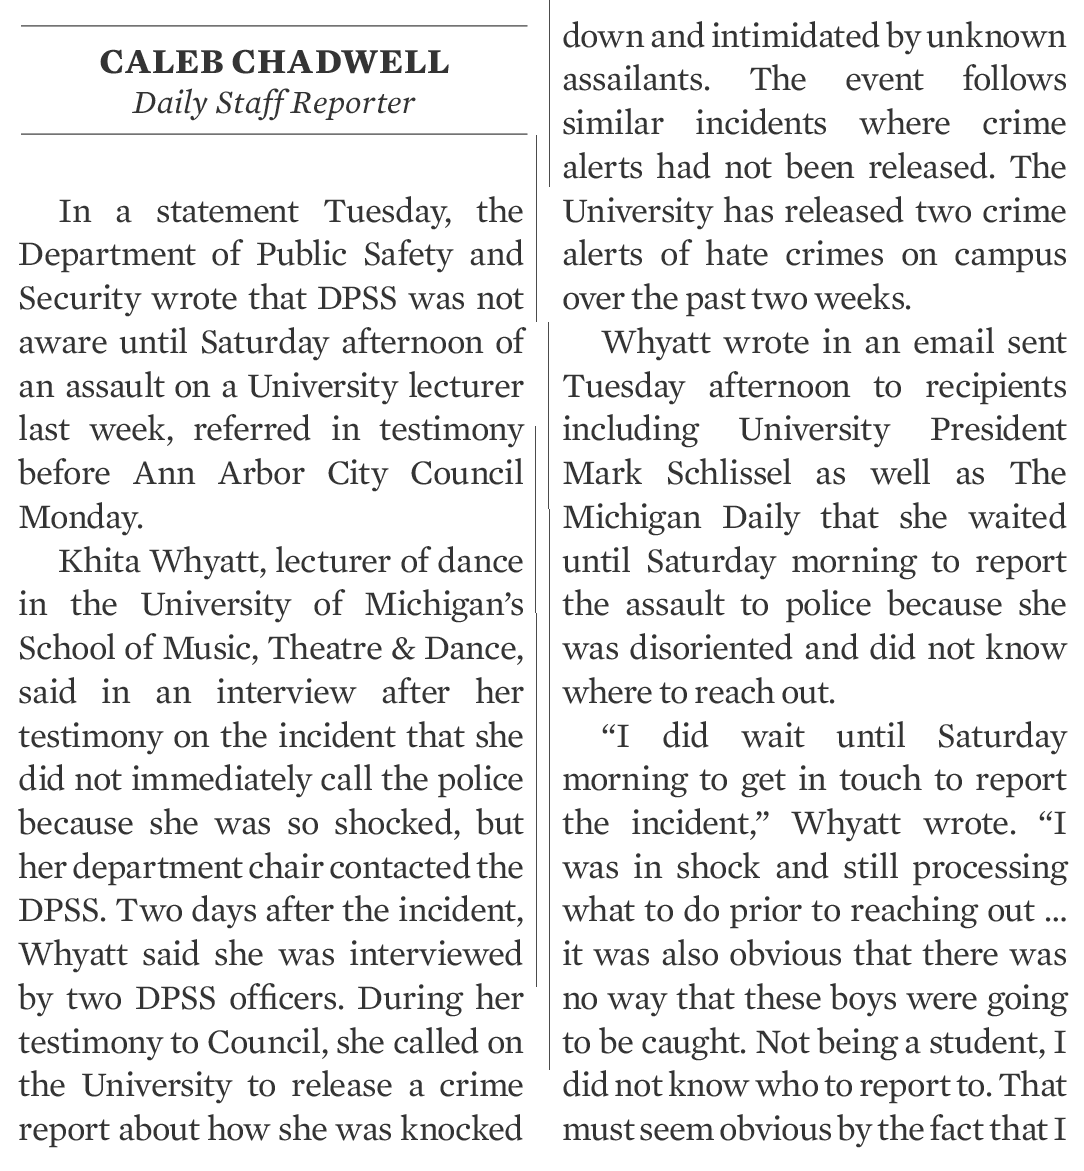

In [16]:
#(1) cargamos la ruta "two_col.png" de la imagen y le damos el nombre de imagen_abierta.
imagen_abierta=Image.open("two_col.png")


#(2) creamos una copia a escala de grises de la imagen_abierta y le damos el nombre de imagen_convertida.
imagen_convertida=imagen_abierta.convert("L")


#(3) usamos la función creada previamente para mostrar los segmentos de recta separadores de texto.
imagen_con_lineas=insertar_lineas(imagen_convertida)


#(4) mostramos en pantalla imagen_con_lineas.
display(imagen_con_lineas)


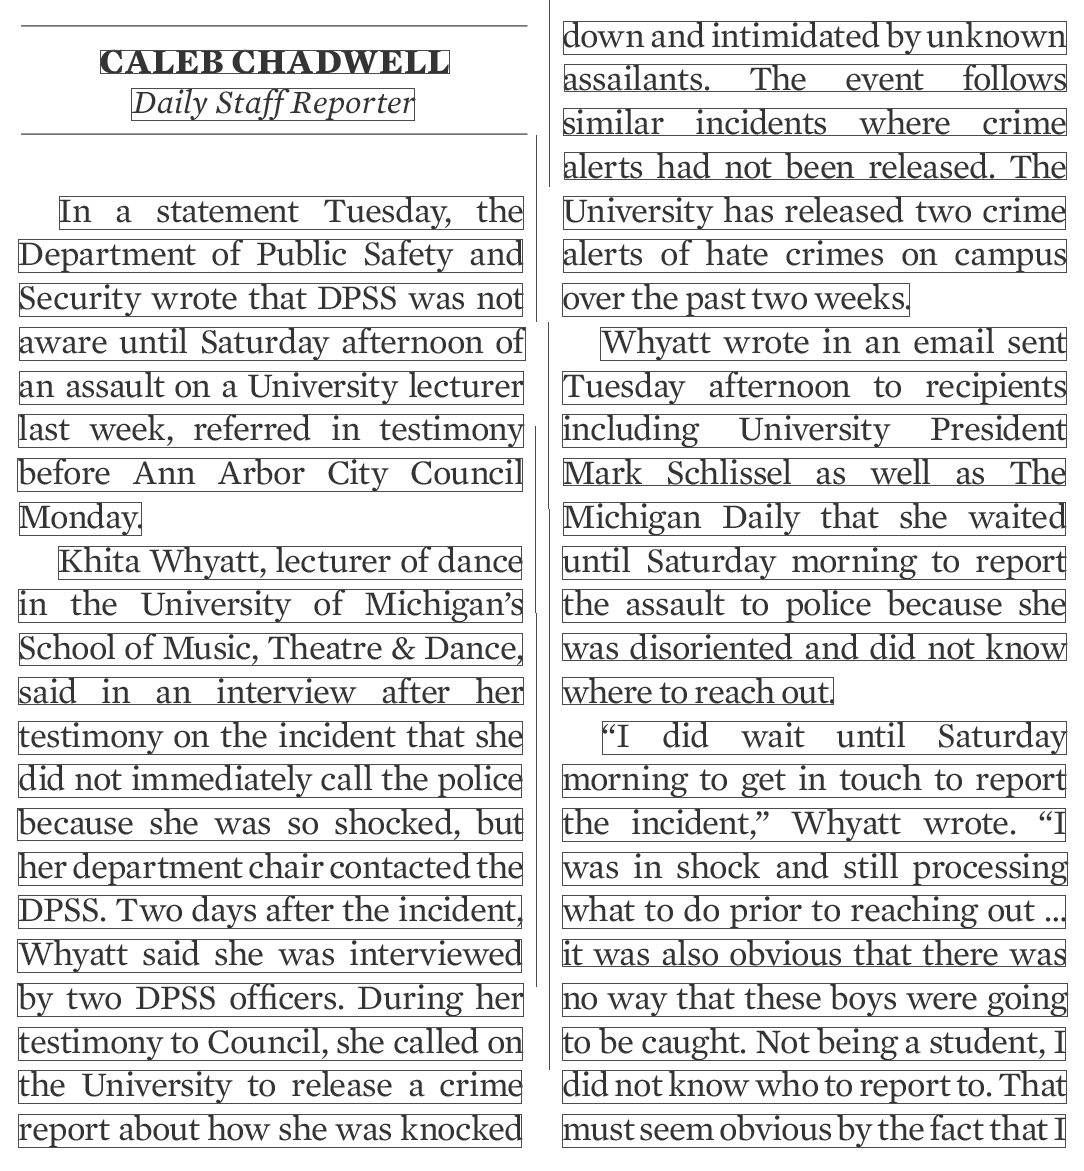

In [17]:
#mostramos los cuadros delimitadores de las lineas de texto de la imagen_con_lineas.
display(mostrar_cuadros_2(imagen_con_lineas))



In [21]:
#instalamos tesseract, ya que no se encuentra incluido.
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [22]:
#instalación de pytesseract.
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


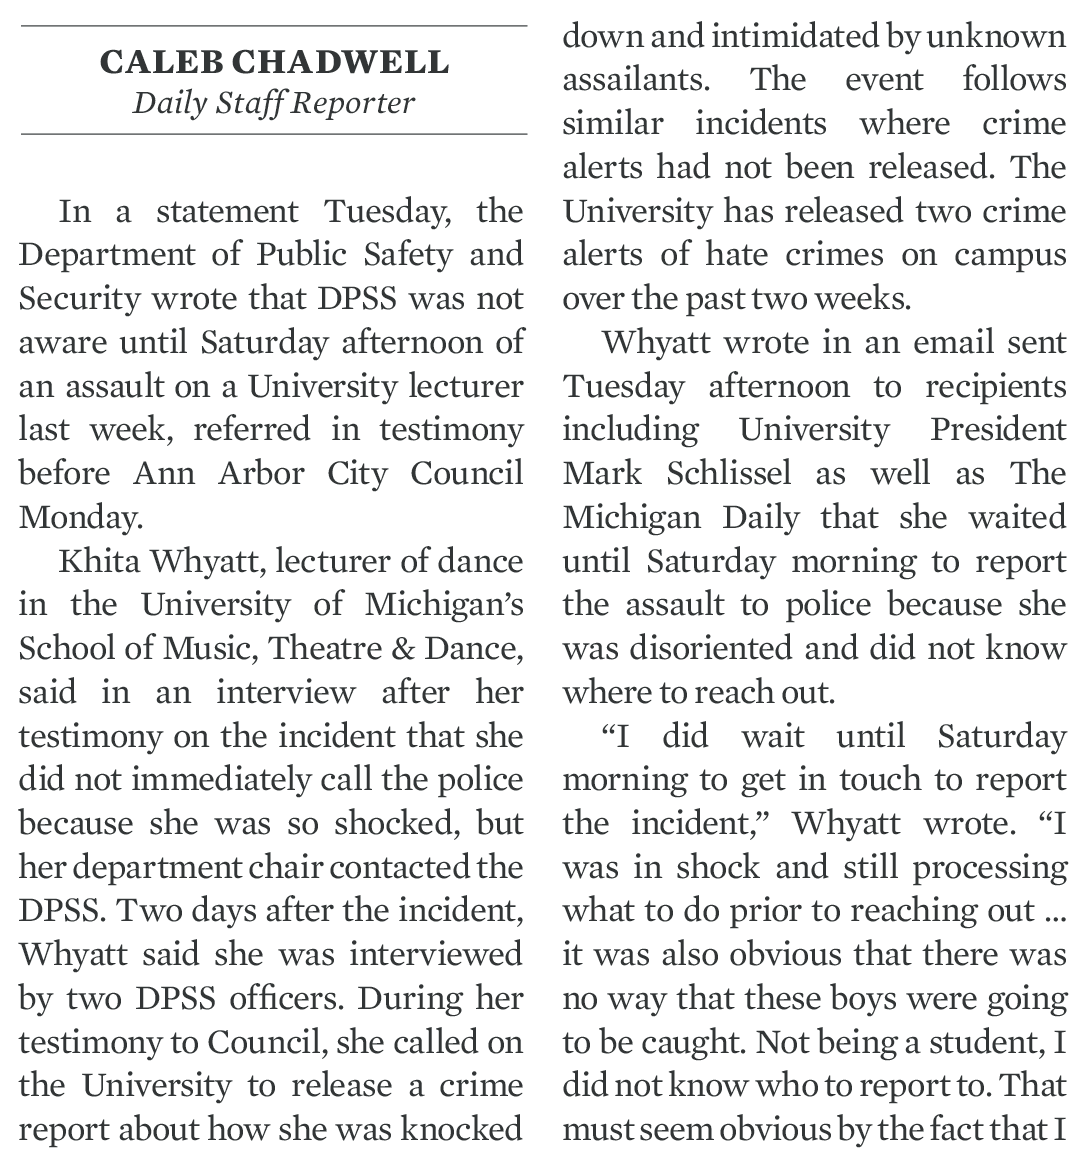

 

CALEB CHADWELL
Daily Staff Reporter

 

In a statement Tuesday, the
Department of Public Safety and
Security wrote that DPSS was not
aware until Saturday afternoon of
an assault on a University lecturer
last week, referred in testimony
before Ann Arbor City Council
Monday.

Khita Whyatt, lecturer of dance
in the University of Michigan’s
School of Music, Theatre & Dance,
said in an interview after her
testimony on the incident that she
did not immediately call the police
because she was so shocked, but
her department chair contacted the
DPSS. Two days after the incident,
Whyatt said she was interviewed
by two DPSS officers. During her
testimony to Council, she called on
the University to release a crime
report about how she was knocked

down and intimidated by unknown
assailants. The event follows
similar incidents where crime
alerts had not been released. The
University has released two crime
alerts of hate crimes on campus
over the past two weeks.

Whyatt wrote in an email sent
Tue

In [20]:
import pytesseract
import PIL
from PIL import Image

texto=pytesseract.image_to_string(imagen)
display(imagen)
print(texto)